# Heart Failure Prediction
This is my first individual machine learning project for university assignments. I hope it is useful for beginners who have just started to learn machine learning. The techiniques used in this project include as follows:
* Supervised Learning (Classification)
 1. Decision Tree
 2. Random Forest
 3. Support Vector Machine
* Unsupervised Learning
 1. Principal Component Analysis (PCA) 
 2. K-Means

Please do not copy my code for your assignments, you will learning nothing from this action.

# 1. 数据分析和可视化

数据集包含来自巴基斯坦费萨拉巴德心脏病学院和联合医院收集的299名心脏衰竭患者的医疗记录。数据集包含13个特征，涉及身体、临床和生活方式信息，这些特征可以分为两类数据类型：二进制和非二进制数据类型。二进制特征只包含0（无）和1（有）两个值，而非二进制特征是任何实数。`DEATH_EVENT`特征是分类算法的标签（输出）。

特征定义如下表所示。


| Features      | Explanation | Data Type
| ------------- | ----------- | -----
| age           | Age of the patient | Any number
| anaemia       | If a patient has a low level of red blood cells | 0 and 1
| creatinine_phosphokinase | Level of this enzyme in the blood  | Any number
| diabetes      | If a the patient has diabetes | 0 and 1
| ejection_fraction  | Percentage of blood pumped out of the heart during a single contraction | Any number
| high_blood_pressure | If a patient has a high blood pressure | 0 and 1
| platelets     | Platelets in the blood | Any number
| serum_creatinine | Level of creatinine in the blood | Any number
| serum_sodium | Level of creatinine in the blood | Any number
| sex | Female and Male | 0 (Female) and 1 (Male)
| smoking | If a patient smokes | 0 and 1
| time | Follow-up period (Days) | Any number
| DEATH_EVENT | If a patient died before the end of the follow-up period | 0 and 1creatinine_phosphokinase 

为了从数据集中发现更多信息，我们将执行一些数据分析，以可视化特征（自变量）与`DEATH_EVENT`之间的关系。在第1.1-1.3节，我们首先导入相关的Python包并将数据集加载到这个笔记本中。

以下是进行这些分析的Python代码示例：

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from pandas.plotting import scatter_matrix

data = pd.read_csv('heart_failure_clinical_records_dataset.csv')#dataframe
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


## 1.1 Age and Death
下面的箱线图展示了年龄与死亡之间的关系。总体来看，死亡患者的年龄普遍高于存活患者。存活患者的平均年龄对于两性来说大约是60岁，而死亡的男性患者的平均年龄是65岁，高于死亡的女性患者的60岁。

为了创建这样的箱线图，你可以使用Matplotlib或Seaborn库。这里是一个如何用Python实现的示例代码：

58.761906403940884


/tmp/ipykernel_4021869/3837236077.py:6: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.boxplot(data = data, x = 'DEATH_EVENT', y = 'age', hue = 'sex', width = 0.4, ax = ax, fliersize = 3, palette=sns.color_palette("pastel"))
/tmp/ipykernel_4021869/3837236077.py:7: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.stripplot(data = data, x = 'DEATH_EVENT', y = 'age', hue = 'sex', size = 3, palette=sns.color_palette())


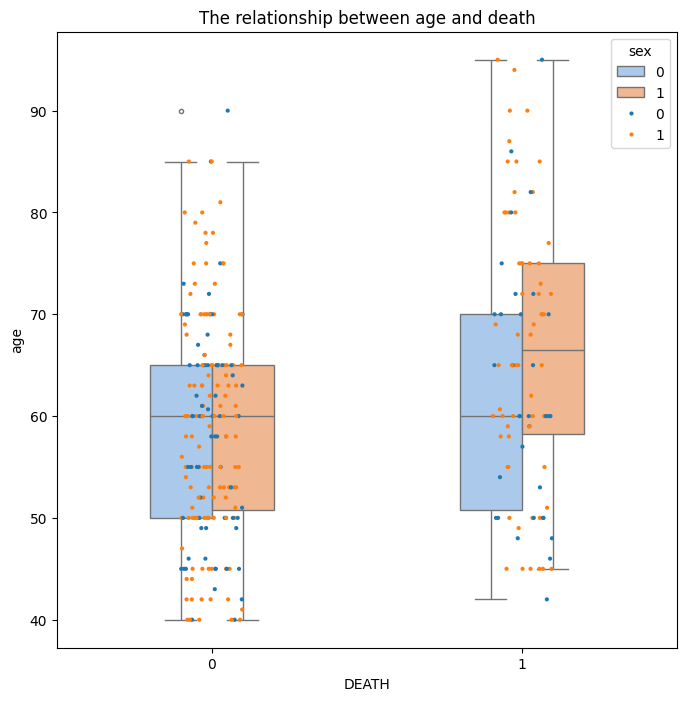

In [10]:
fig, ax = plt.subplots(figsize = (8, 8))
survive = data.loc[(data.DEATH_EVENT == 0)].age
death = data.loc[(data.DEATH_EVENT == 1)].age
print(survive.mean())

sns.boxplot(data = data, x = 'DEATH_EVENT', y = 'age', hue = 'sex', width = 0.4, ax = ax, fliersize = 3, palette=sns.color_palette("pastel"))
sns.stripplot(data = data, x = 'DEATH_EVENT', y = 'age', hue = 'sex', size = 3, palette=sns.color_palette())
ax.set(xlabel = 'DEATH', ylabel="age", title='The relationship between age and death')
plt.show()

## 1.2 Ejection Fraction/Serum Cretinine and Death （射血分数/血清肌酐与死亡）

小提琴图展示了ejection_fraction（左侧）/serum_creatinine（右侧）与死亡的关系。在左侧图中，存活和死亡患者之间的ejection_fraction存在显著差异。心脏泵出血液的百分比较低的患者往往死亡，而ejection_fraction超过35的大部分患者则存活下来。另一方面，右侧图表显示，两种患者之间的serum_creatinine水平没有显著差异。

小提琴图展示了ejection_fraction（左侧）/serum_creatinine（右侧）与死亡的关系。在左侧图中，存活和死亡患者之间的ejection_fraction存在显著差异。心脏泵出血液的百分比较低的患者往往死亡，而ejection_fraction超过35的大部分患者则存活下来。另一方面，右侧图表显示，两种患者之间的serum_creatinine水平没有显著差异。

/tmp/ipykernel_4021869/3480697146.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data, x='DEATH_EVENT', y='ejection_fraction', ax=ax[0], palette=sns.color_palette('Set2'))
/tmp/ipykernel_4021869/3480697146.py:2: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.violinplot(data=data, x='DEATH_EVENT', y='ejection_fraction', ax=ax[0], palette=sns.color_palette('Set2'))
/tmp/ipykernel_4021869/3480697146.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data, x='DEATH_EVENT', y='serum_creatinine', ax=ax[1], palette=sns.color_palette('Set2'))
/tmp/ipykernel_4021869/3480697146.py:3: UserWarning: The palette list has more val

<Axes: xlabel='DEATH_EVENT', ylabel='serum_creatinine'>

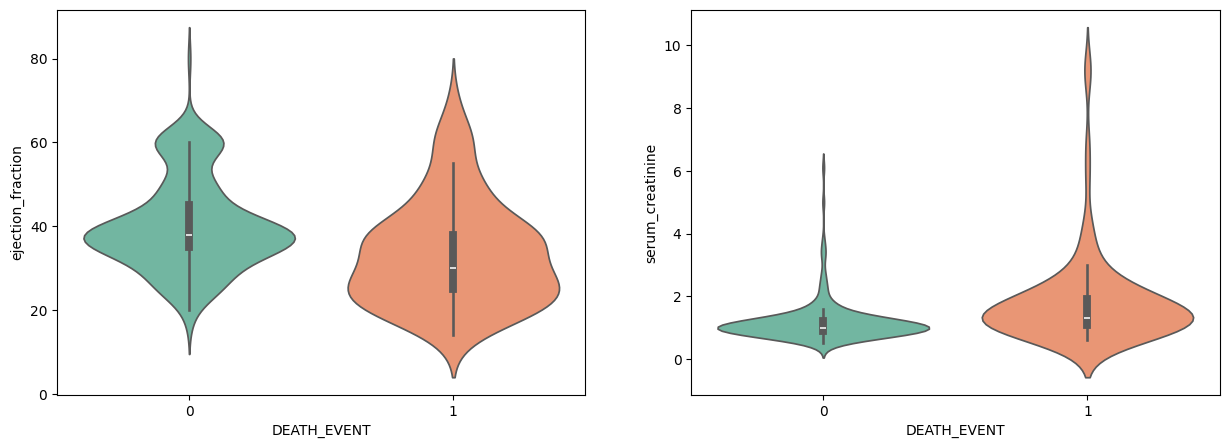

In [11]:
fig, ax = plt.subplots(ncols=2, figsize = (15, 5))
sns.violinplot(data=data, x='DEATH_EVENT', y='ejection_fraction', ax=ax[0], palette=sns.color_palette('Set2'))
sns.violinplot(data=data, x='DEATH_EVENT', y='serum_creatinine', ax=ax[1], palette=sns.color_palette('Set2'))

## 1.3 数据关联
下面的数字是特征与DEATH_EVENT之间的相关性。接近1.0和-1.0的相关性分别表示变量是正相关和负相关的。接近0的相关性表示关联较小
* `serum_creatinine`和`age`分别为0.29和0.25，表明它们是正相关且相关性较高
* `time` 和 `ejection_fraction`分别为-0.53和-0.27，表明它们是负相关且相关性较高

In [12]:
corr_matrix = data.corr()
corr_matrix['DEATH_EVENT'].sort_values(ascending=False)

DEATH_EVENT                 1.000000
serum_creatinine            0.294278
age                         0.253729
high_blood_pressure         0.079351
anaemia                     0.066270
creatinine_phosphokinase    0.062728
diabetes                   -0.001943
sex                        -0.004316
smoking                    -0.012623
platelets                  -0.049139
serum_sodium               -0.195204
ejection_fraction          -0.268603
time                       -0.526964
Name: DEATH_EVENT, dtype: float64

# 2. 数据预备
在这一部分，我们将准备数据集，以便机器学习算法执行预测

## 2.1. 数据清洗

数据清洗是准备数据集的第一步，确保在应用过程中不会出现缺失值，因为大多数机器学习算法无法处理缺失的特征。处理缺失值的两种常见方法如下：

* 使用 dropna() 删除带有缺失值的数据。
* 使用 fillna() 填充缺失值。

要检查数据集是否包含缺失值或空值（NaN），我们可以使用 data.info() 或 data.isnull().sum() 来查看每个特征的空值数量。data.info() 显示有299条记录（行）和13个特征（列）。每个特征包含299个非空值。同样，data.isnull().sum() 计算空值的总数，每个特征的空值数为0。因此，由于这个数据集构建得很好，我们不需要进行数据清洗。

In [13]:
data.info()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

## 2.2 特征缩放


特征缩放是在构建机器学习模型之前，将数据缩放到标准范围的一种预处理方法。如果不进行特征缩放，一个数值较大的显著数值可能会因其大的量级影响模型，导致模型在学习过程中表现不佳。


### 2.2.1 二进制与非二进制数据
如第1节所述，数据集包含二进制和非二进制值。我们现在将二进制称为discrete_features，非二进制称为continuous_features。discrete_features的标准差已经很小，范围在0和1之间，所以我们不需要对它们进行缩放。与continuous_features不同，其标准差从1.03变化到97,804。因此，我们必须对这些特征进行缩放。在执行特征缩放之前，我们按如下方式对特征进行分类。

In [14]:
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


我们通过计算每个特征的不同值来分类特征。如果一个特征包含超过2个值，它就是continuous_features。否则，它就是discrete_features。输出DEATH_EVENT不属于任何类型。下面的表格分别显示了discrete_features和continuous_features。

In [8]:
discrete_features, continuous_features = [], []
for feature in data.columns:
    if feature == 'DEATH_EVENT':
        label = feature
    elif len(data[feature].unique()) > 2:
        continuous_features.append(feature)
    else:
        discrete_features.append(feature)

print('Discrete: ', discrete_features, '\n', 'Continuous:', continuous_features, '\n', 'Label:', label)

Discrete:  ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking'] 
 Continuous: ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time'] 
 Label: DEATH_EVENT


In [9]:
data[discrete_features].head()

,anaemia,diabetes,high_blood_pressure,sex,smoking
0,0,0,1,1,0
1,0,0,0,1,0
2,0,0,0,1,1
3,1,0,0,1,0
4,1,1,0,0,0


In [10]:
data[continuous_features].head()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
0,75.0,582,20,265000.00,1.9,130,4
1,55.0,7861,38,263358.03,1.1,136,6
2,65.0,146,20,162000.00,1.3,129,7
3,50.0,111,20,210000.00,1.9,137,7
4,65.0,160,20,327000.00,2.7,116,8


### 2.2.2 使用MinMaxScaler进行标准化

在我们获得continuous_feature之后，我们使用MinMaxScaler进行标准化以缩放特征。缩放后的数据位于0到1之间，每个特征的标准差也在0到1的范围内。现在数据集已经准备好用于构建模型了。

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(data[continuous_features])
scaled_continuous_features = scaler.transform(data[continuous_features])
scaled_continuous_features = pd.DataFrame(data=scaled_continuous_features, columns=['age','creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time' ])
scaled_continuous_features.head()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
0,0.636364,0.071319,0.090909,0.290823,0.157303,0.485714,0.000000
1,0.272727,1.000000,0.363636,0.288833,0.067416,0.657143,0.007117
2,0.454545,0.015693,0.090909,0.165960,0.089888,0.457143,0.010676
3,0.181818,0.011227,0.090909,0.224148,0.157303,0.685714,0.010676
4,0.454545,0.017479,0.090909,0.365984,0.247191,0.085714,0.014235


The table below shows that all features have the standard deviation between 0 and 1.

In [12]:
scaled_data = pd.concat([data[discrete_features], scaled_continuous_features, data['DEATH_EVENT']], axis=1)
scaled_data.describe()

,anaemia,diabetes,high_blood_pressure,sex,smoking,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000
mean,0.431438,0.418060,0.351171,0.648829,0.32107,0.378798,0.071299,0.364903,0.288833,0.100436,0.675012,0.449327,0.32107
std,0.496107,0.494067,0.478136,0.478136,0.46767,0.216269,0.123793,0.179316,0.118565,0.116237,0.126071,0.276207,0.46767
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.000000,0.000000,0.000000,0.000000,0.00000,0.200000,0.011929,0.242424,0.227179,0.044944,0.600000,0.245552,0.00000
50%,0.000000,0.000000,0.000000,1.000000,0.00000,0.363636,0.028961,0.363636,0.287186,0.067416,0.685714,0.395018,0.00000
75%,1.000000,1.000000,1.000000,1.000000,1.00000,0.545455,0.071319,0.469697,0.337495,0.101124,0.771429,0.708185,1.00000
max,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


## 2.3 训练和测试

在构建机器学习模型时，缩放后的数据集被分为训练集和测试集。我们使用train_test_split函数，将70%的数据集设置为训练集，30%的数据集设置为测试集。分割数据时，我们根据标签进行stratify，以确保训练集和测试集在DEATH_EVENT的数量上保持平衡。在这个项目中，使用random_state=42来确保结果可复现。

In [13]:
X_train, X_test, y_train, y_test = train_test_split(scaled_data.iloc[:,:-1], scaled_data.iloc[:,-1], stratify = scaled_data['DEATH_EVENT'], test_size=0.3, random_state=42)

In [15]:
num_all = np.unique(scaled_data['DEATH_EVENT'], return_counts=True)
print('             The number of DEATH_EVENT')
print('                   0        |      1')
print('------------------------------------------')
print('All dataset      ', num_all[1][0], ' '*5, '|', ' '*4, num_all[1][1])
num_train = np.unique(y_train, return_counts=True)
print('Train set (70%)  ', num_train[1][0], ' '*5, '|', ' '*4, num_train[1][1])
num_test = np.unique(y_test, return_counts=True)
print('Test set (30%)    ', num_test[1][0], ' '*5, '|', ' '*4, num_test[1][1])

             The number of DEATH_EVENT
                   0        |      1
------------------------------------------
All dataset       203       |      96
Train set (70%)   142       |      67
Test set (30%)     61       |      29


# 3. 有监督学习

心脏衰竭数据集的标签DEATH_EVENT有两个不同的值：0和1。因此，我们使用<b>分类算法</b>来构建监督机器学习模型。

## 3.1 决策树

首先，我们构建了一个决策树分类器，使用gini作为标准，并未定义max_depth参数。该树执行到所有剩余节点都纯净为止，即没有办法再分割左侧节点。树的最大深度为8。

In [17]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

tree_clf = DecisionTreeClassifier(criterion='gini')
tree_clf = tree_clf.fit(X_train, y_train)
print('The maximum depth of the tree is ', tree_clf.get_depth())

The maximum depth of the tree is  8


### 3.1.1 决策树过拟合问题
我们计算了深度从1到8的Train Accuracy（训练准确率）和Test Accuracy（测试准确率）。Train Accuracy和Test Accuracy是在第2.3节中分割的训练集和测试集的准确率。我们清楚地看到，树的深度越高，Train Accuracy越接近于1。这是因为在深度为8的模型中，模型将持续分割直至左侧节点纯净，从而使模型在预测中达到完美。然而，这会导致决策树分类器出现过拟合问题。

为了避免过拟合，应用了<b>k-折交叉验证</b>程序来缓解这一问题。模型使用k-1折的数据作为训练数据进行训练。剩余部分用作测试数据来衡量每一折的准确率。然后，计算准确率的平均值作为结果。应用交叉验证后，模型不再受到过拟合的困扰。

In [18]:
accuracies = []
print('Depth', ' Train Accuracy', ' Test Accuracy', ' CV Accuracy')

for d in range(1,9):
    tree_clf = DecisionTreeClassifier(criterion='gini', max_depth = d)
    tree_clf = tree_clf.fit(X_train, y_train)
    
    train_accuracy = tree_clf.score(X_train, y_train)
    test_accuracy = tree_clf.score(X_test, y_test)
    
    cv_accuracy = np.mean(cross_val_score(tree_clf, X_train, y_train, cv=5))
    accuracies.append([d, train_accuracy, test_accuracy, cv_accuracy])
    
    print(' ', d, ' '*6, '%.4f' % train_accuracy, ' '*8, '%.4f'% test_accuracy, ' '*5, '%.4f'% cv_accuracy)

Depth  Train Accuracy  Test Accuracy  CV Accuracy
  1        0.8565          0.8222       0.8470
  2        0.8565          0.8222       0.8325
  3        0.8900          0.7889       0.7849
  4        0.9139          0.8222       0.7895
  5        0.9522          0.7667       0.7800
  6        0.9809          0.7667       0.7705
  7        0.9952          0.7333       0.7561
  8        1.0000          0.7778       0.7659


### 3.1.2 树深度的准确度
下面的折线图展示了Train Accuracy、Test Accuracy和CV Accuracy。我们忽略了训练准确率，因为它会导致过拟合问题。现在我们关注Test accuracy和CV Accuracy。随着深度的增加，两者的准确率都在下降。测试准确率在整个过程中波动，而交叉验证准确率平稳下降。为了选择最准确的模型，我们考虑选择准确率最高的模型。准确率最高的是在深度为1时进行交叉验证的树。

##### 性能最高的决策树是max_depth=1的模型。其训练和测试准确率分别为0.8470和0.8222。

In [19]:
accuracies = pd.DataFrame( 
    data = accuracies, 
    columns = ['Depth', 'Train Accuracy','Test Accuracy', 'CV Accuracy']
)    

accuracies = pd.melt(
    accuracies,
    id_vars = ['Depth'],
    var_name = 'Type',
    value_name = 'Accuracy'
) 
sns.lineplot(
    x = 'Depth',
    y = 'Accuracy',
    hue = 'Type',
    data = accuracies,

).set_title('The relationship between the depth of the tree and accuracies')

Text(0.5, 1.0, 'The relationship between the depth of the tree and accuracies')

### 3.1.3 Tree Plot
我们使用plot_tree来查看分裂的信息。下面的图片显示了深度为3的示例分裂。这对于向非IT人员解释决策树算法的工作方式非常有用。它包括：

* 特征名称及其分裂值
* gini = 基尼值
* samples = 样本总数
* value = DEATH_EVENT的数量
* class = DEATH_EVENT的类别

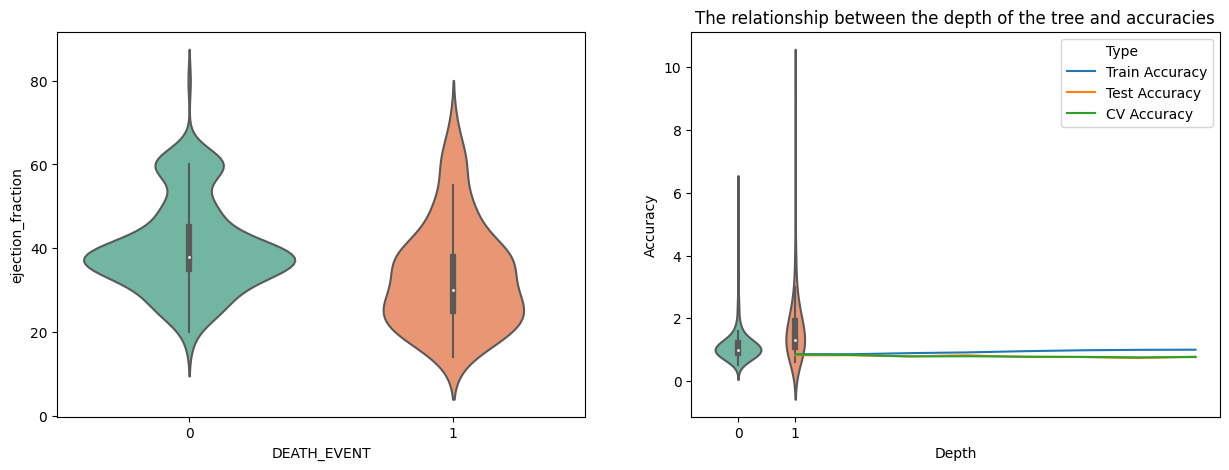

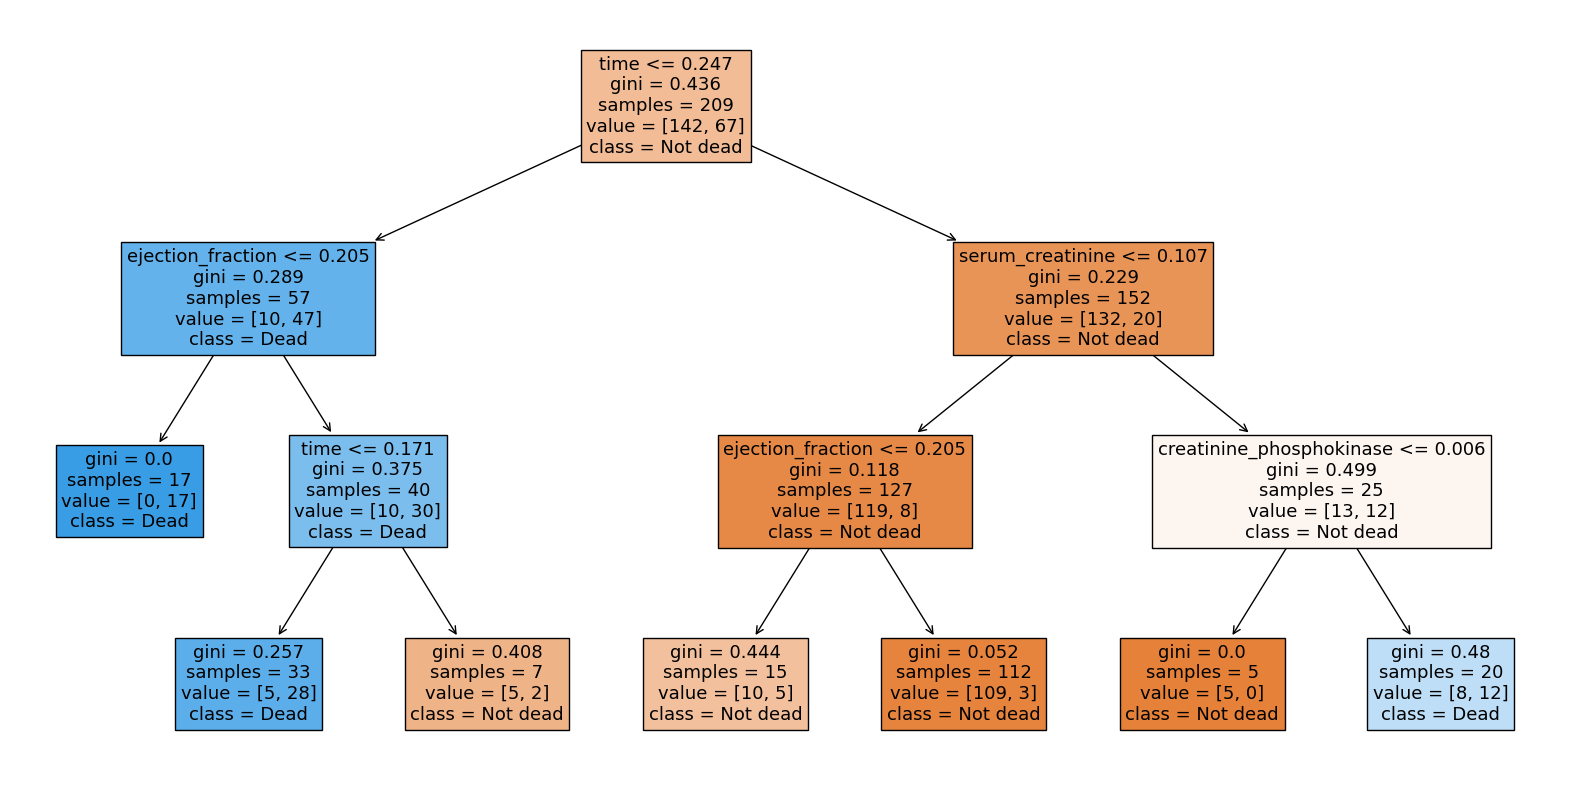

In [20]:
tree_clf = DecisionTreeClassifier(criterion='gini', max_depth=3)
tree_clf = tree_clf.fit(X_train,y_train)
plt.subplots(figsize=(20,10))
plot_tree(tree_clf, fontsize=13, feature_names=scaled_data.columns, class_names=['Not dead', 'Dead'], filled=True)
plt.show()

## 4.2 随机森林

随机森林是构建模型中使用的第二种技术。它基于决策树。

### 4.2.1 准确度比较

随机森林也会导致过拟合问题，与决策树相同。深度越高，准确率越接近1.0。应用CV Accuracy来避免过拟合。随机森林需要设置许多参数以用于分类器。我们将在4.2.3节讨论如何定义最佳参数。现在我们定义n_estimators=100，这是一个对我们的计算资源来说可接受的数字。更高的数值会增加计算时间。

In [21]:
from sklearn.ensemble import RandomForestClassifier
accuracies = []
print('Depth', ' Train Accuracy', ' Test Accuracy', ' CV Accuracy')

for d in range(1,8):
    rf_clf = RandomForestClassifier(n_estimators=100, max_depth=d, criterion='gini', random_state=42)
    rf_clf = rf_clf.fit(X_train, y_train)
    
    train_accuracy = rf_clf.score(X_train, y_train)
    test_accuracy = rf_clf.score(X_test, y_test)
    cv_accuracy = np.mean(cross_val_score(rf_clf, X_train, y_train, cv=5))
    accuracies.append([d, train_accuracy, test_accuracy, cv_accuracy])
    
    print(' ', d, ' '*6, '%.4f' % train_accuracy, ' '*8, '%.4f'% test_accuracy, ' '*5, '%.4f'% cv_accuracy )

Depth  Train Accuracy  Test Accuracy  CV Accuracy
  1        0.7512          0.7222       0.7372
  2        0.8708          0.8000       0.8136
  3        0.9187          0.8333       0.8613
  4        0.9426          0.8556       0.8518
  5        0.9569          0.8111       0.8708
  6        0.9761          0.8222       0.8423
  7        1.0000          0.8444       0.8518


### 4.2.2 准确度  Depth of Tree
与决策树不同，当我们增加树的深度时，随机森林的准确率呈现上升趋势。CV Accuracy在达到深度3时急剧增加，并且准确率保持相对稳定。与决策树相比，Test Accuracy的波动较小。它在深度为4时显著提高，然后在深度为5时下降。

In [22]:
accuracies = pd.DataFrame( 
    data = accuracies, 
    columns = ['Depth', 'Train Accuracy','Test Accuracy', 'CV Accuracy']
)    

accuracies = pd.melt(
    accuracies,
    id_vars = ['Depth'],
    var_name = 'Type',
    value_name = 'Accuracy'
) 
sns.lineplot(
    x = 'Depth',
    y = 'Accuracy',
    hue = 'Type',
    data = accuracies,

).set_title('The relationship between the depth of the tree and accuracies')

Text(0.5, 1.0, 'The relationship between the depth of the tree and accuracies')

### 4.2.3 超参数调优

超参数调优用于推荐搜索超参数空间，以获得最高的交叉验证分数。我们使用param_grid中给定的参数构建GridSearchCV。随机森林的最佳参数是{'criterion': 'gini', 'max_depth': 3, 'n_estimators': 200}，准确率为<b>0.8662</b>。

In [23]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'n_estimators': [100, 200, 500],
    'max_depth': [2,3,4],
}
clf_grid = GridSearchCV(estimator = RandomForestClassifier(random_state=42), param_grid=param_grid, cv=5)
clf_grid.fit(X_train, y_train)
clf_grid.best_params_

{'criterion': 'gini', 'max_depth': 3, 'n_estimators': 200}

In [24]:
print('CV Accuracy: %.4f' % clf_grid.best_score_)
print('Test Accuracy: %.4f' % clf_grid.score(X_test, y_test))

CV Accuracy: 0.8662
Test Accuracy: 0.8444


##### 性能最高的随机森林模型使用了基尼系数（gini），max_depth=3，n_estimators=200。其训练和测试准确率分别为0.8662和0.8444。

### 4.2.4 特征重要性

特征重要性是一种为特征分配分数的程序，用于在构建模型时表明每个特征的相对重要性。这些分数提供了对数据集的洞察，告诉我们哪些特征最相关或最不相关。构建模型后，我们使用feature_importances_来查看每个特征的相对重要性分数。从下面的条形图中我们可以解读出，time是预测中最重要的特征。

In [25]:
rf_fi = RandomForestClassifier(n_estimators=200, max_depth=3, criterion='gini', random_state=42)
rf_fi = rf_fi.fit(X_train, y_train)

importances = list(rf_fi.feature_importances_)
scaled_data_col_name = list(scaled_data.columns[:-1].to_numpy())

plt.bar(scaled_data_col_name , importances, color='lightblue')
plt.xticks(ticks = scaled_data_col_name, labels = scaled_data_col_name, rotation = 'vertical')
plt.ylabel('Importance')
plt.xlabel('Feature')
plt.title('Feature Importances')

/home/daniel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  import sys
/home/daniel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  import sys
/home/daniel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  import sys
/home/daniel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Support for passing numbers through unit converters

Text(0.5, 1.0, 'Feature Importances')

## 4.3 支持向量机SVM

SVM提供三种核函数：线性、多项式和径向基（rbf）。我们使用GridSearchCV来选择支持向量分类器的最佳参数。结果是kernel='linear'和C=10。我们可以忽略degree和gamma，因为它们只在多项式和rbf核中使用。最高准确率<b>0.8280</b>是通过交叉验证得到的模型性能。

In [26]:
from sklearn.svm import SVC
param_grid = {
    'kernel': ['linear', 'poly', 'rbf'],
    'C': [0.001, 0.01, 0.1, 1, 10],
    'degree': [2,3,4],
    'gamma': [0.001, 0.01, 0.1, 1, 10]
}
clf_grid_SVC = GridSearchCV(estimator = SVC(random_state=42), param_grid=param_grid, cv=5)
clf_grid_SVC.fit(X_train, y_train)
clf_grid_SVC.best_params_

{'C': 10, 'degree': 2, 'gamma': 0.001, 'kernel': 'linear'}

In [27]:
print('CV Accuracy: %.4f' % clf_grid_SVC.best_score_)
print('Test Accuracy: %.4f' % clf_grid_SVC.score(X_test, y_test))

CV Accuracy: 0.8280
Test Accuracy: 0.8222


##### The support vector machine with the highest performance is the model with linear kernel and `C`=10. The train and test accuracy are 0.8280 and 0.8222, respectively.

# 4. 无监督学习
## 4.1 主成分分析(PCA) 

### 4.1.1 降维

PCA 的一个能力是降低数据集的维度以减少计算时间。PCA 用于找到在数据集中解释大部分方差（95-100%）的特征，而无需使用所有特征进行计算。我们的数据集包含 12 个特征，不包括标签，用于创建 12 个主成分（PC）。每个主成分产生特征向量 components_ 和特征值 explained_variance_。下面的折线图显示了 explained_variance_ 在百分比上的急剧下降趋势，直到它在 PC8 处趋势几乎保持稳定。

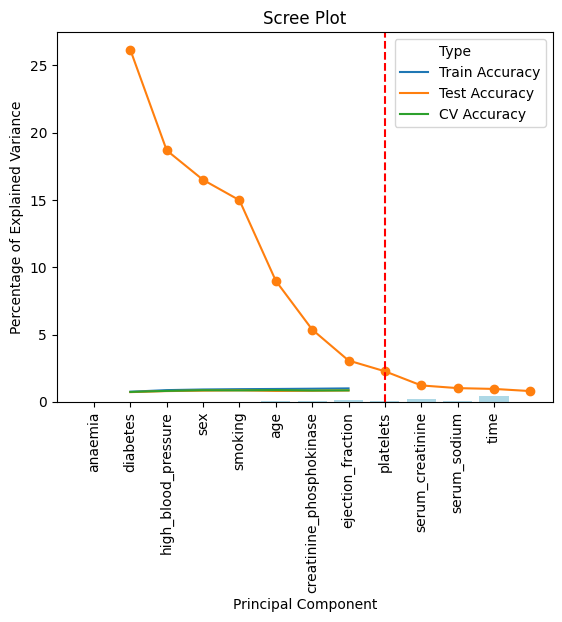

In [28]:
from sklearn.decomposition import PCA

pca_data = scaled_data.drop(columns='DEATH_EVENT')
pca = PCA()
pca.fit(pca_data)

percentage_variance = np.round(pca.explained_variance_ratio_ * 100, decimals=2)
xlabels = ['PC' + str(x) for x in range(1, len(percentage_variance)+1)]

plt.plot(range(1,len(percentage_variance)+1), percentage_variance, '-o')
plt.axvline(x=8, color='red', linestyle='--')
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

为了选择正确的维度数量，我们可以在构建 PCA 时输入成分的数量（即 PCA(n_components=8)）。然而，指定我们想要保留的方差比例（在 0.0 到 1.0 之间）要简单得多。在这个实验中，我们想要保留数据集方差的 95%，因此我们定义 n_components=0.95。转换后，维度从 12 降低到了 8 个成分。

299 是记录的数量，8 是降维后的成分数量。

In [29]:
pca95 = PCA(n_components=0.95)
pca95.fit_transform(pca_data).shape

(299, 8)

下面的八个条形图展示了特征向量和主成分。例如，sex 和 smoking 在 PC1 中占主导地位，anaemia 在 PC2 中占主导地位，依此类推。

In [30]:
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(15, 18))

row = -1; col = 0
for i in range(0,8):
    
    if(i%2 == 0): 
        col = 0
        row = row + 1
    else: 
        col=1
    
    sns.barplot(x=abs(pca.components_[i]), y=pca_data.columns, orient='h', ax=ax[row][col])
    ax[row][col].set_title('Principal Component ' + str(i+1))

### 4.1.2 PCA与监督学习模型

PCA被应用于具有最高准确度的监督学习模型中。通过PCA减少的成分被用作构建带有PCA的新训练和测试数据集的模型。我们比较了第三部分原始模型和带有PCA的模型的准确度。在应用PCA之后，决策树和随机森林模型的准确度下降了。另一方面，当进行PCA时，具有线性核的SVM模型的准确度增加了。SVM的准确度从0.8280增加到0.8444。

通过这个实验，我们可以得出结论：降低数据集的维度并不总是比使用所有维度产生更好的结果。

In [38]:
print('                  Original           With PCA')
print('---------------------------------------------------')
ori_accuracy = []
pca_accuracy = []

# Without PCA
tree_clf = DecisionTreeClassifier(criterion='gini', max_depth = 1, random_state=42)
tree_clf = tree_clf.fit(X_train, y_train)
ori_accuracy.append(np.mean(cross_val_score(tree_clf, X_train, y_train, cv=5)))

rf_clf = RandomForestClassifier(n_estimators=200, max_depth=3, criterion='gini', random_state=42)
rf_clf = rf_clf.fit(X_train, y_train)
ori_accuracy.append(np.mean(cross_val_score(rf_clf, X_train, y_train, cv=5)))

svc_clf = SVC(kernel='linear', C=10, random_state=42)
svc_clf = svc_clf.fit(X_train, y_train)
ori_accuracy.append(np.mean(cross_val_score(svc_clf, X_train, y_train, cv=5)))

# With PCA
pca95 = PCA(n_components=0.95)
X_train_reduced = pca95.fit_transform(X_train)
X_test_reduced = pca95.transform(X_test)

tree_clf_pca = DecisionTreeClassifier(criterion='gini', max_depth = 1, random_state=42)
tree_clf_pca = tree_clf_pca.fit(X_train_reduced, y_train)
pca_accuracy.append(tree_clf_pca.score(X_test_reduced, y_test))

rf_clf_pca = RandomForestClassifier(n_estimators=200, max_depth=3, criterion='gini', random_state=42)
rf_clf_pca = rf_clf_pca.fit(X_train_reduced, y_train)
pca_accuracy.append(rf_clf_pca.score(X_test_reduced, y_test))

svc_clf_pca = SVC(kernel='linear', C=10)
svc_clf_pca = svc_clf_pca.fit(X_train_reduced, y_train)
pca_accuracy.append(svc_clf_pca.score(X_test_reduced, y_test))

print('Decision Tree      %.4f' % ori_accuracy[0], ' '*11, '%.4f'%pca_accuracy[0])
print('Random Forest      %.4f' % ori_accuracy[1], ' '*11, '%.4f'%pca_accuracy[1])
print('SVM', ' '*14, '%.4f'%ori_accuracy[2], ' '*11, '%.4f'%pca_accuracy[2])

                  Original           With PCA
---------------------------------------------------
Decision Tree      0.8470             0.8111
Random Forest      0.8662             0.8222
SVM                0.8280             0.8444


## 4.2 K-Means

K-Means是一种将未标记数据聚类成k个组的算法，每个数据点被分配到最近的质心。在本节中，我们假设我们的数据集没有标签，因此我们只使用12个独立变量构建算法，不包括DEATH_EVENT。模型的性能取决于k的值。为了找到最佳的k值，我们使用肘部法。

### 4.2.1 Elbow方法
肘部法绘制了惯性值（或损失函数）和聚类数（k）的关系图。惯性值表示集群内部的数据点之间的距离。随着聚类数的增加，损失减少。这意味着每个聚类具有更少的数据点，并且数据点更接近它们的质心。损失下降最多的k值被称为肘部，也是我们划分更多聚类的位置。在这个实验中，很难确定肘部的拐点，因为图表呈现出平滑的下降趋势。

In [39]:
from sklearn.cluster import KMeans
losses = []
for K in range(1, 15):
    kmeans = KMeans(n_clusters=K)
    kmeans.fit(scaled_data.iloc[:,:-1])
    losses.append(kmeans.inertia_)
    
plt.plot(range(1,15), losses, '-o')
plt.xlabel('Number of Clusters')
plt.ylabel('Loss')

Text(625.4381313131312, 0.5, 'Loss')

### 4.2.2 Accuracy 比较

在本节中，我们比较了K均值聚类的输出和原始输出。鉴于我们想要将患者分成两组：死亡和存活患者。因此，我们将模型的k值设为2。下表显示了K均值和原始数据集的输出。

In [40]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=42)
kmeans = kmeans.fit(scaled_data.iloc[:,:-1])
kmeans_label = kmeans.labels_
kmeans_label = pd.DataFrame(kmeans_label, columns=['K-Means label'])
pd.concat([kmeans_label, scaled_data.iloc[:, -1:]], axis=1).head()

,K-Means label,DEATH_EVENT
0,1,1
1,1,1
2,1,1
3,1,1
4,0,1


K均值模型的准确率为0.4448，有两个聚类。

In [41]:
print('K-means accuracy: %.4f'%metrics.accuracy_score(kmeans_label, scaled_data.iloc[:, -1:]))

K-means accuracy: 0.4448


# 5. 模型比较

我们比较了不同模型的准确率，结果显示，使用随机森林分类技术而没有使用PCA的模型具有最高的准确率，为0.8662。






| Models      | Accuracy 
| ------------| ----------- 
| Random Forest | 0.8662
| Decision Tree | 0.8470
| SVM with PCA | 0.8444
| SVM | 0.8280
| Random Forest with PCA | 0.8222
| Decision Tree with PCA | 0.8111
| K-means | 0.4448

# 6. Reference
* Professor Soufiane Hayou's Jupyter notebook files
* Heart Failure Dataset: https://www.kaggle.com/andrewmvd/heart-failure-clinical-data
* Research in Heart Failure Dataset: https://bmcmedinformdecismak.biomedcentral.com/articles/10.1186/s12911-020-1023-5#Sec3
* Python Book: Python Data Science Handbook, Jake VanderPlas, O'Reilly
* Python Book: Introduction to Machine Learning with Python, Andreas C. Müller & Sarah Guido, O'Reilly
* Machine Learning Framework: https://scikit-learn.org/
* Machine Learning Information: https://machinelearningmastery.com/

